# Import Libraries

In [1]:
import os

import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import modules.prepare as myPrepare
import modules.preprocess as myPrep
import modules.modeling as myModeling

# Global Variables

In [2]:
# path
BASE_PATH: str = os.path.abspath('./')
DATASET_PATH: str = BASE_PATH + '/data'

# file name
TRAIN_DATA_PATH: str = DATASET_PATH + '/train.csv'
TEST_DATA_PATH: str = DATASET_PATH + '/test.csv'
SUBMISSION_PATH: str = DATASET_PATH + '/gender_submission.csv'

# dataset
TARGET_COLUMN = 'Survived'

# Get Dataset

In [3]:
# type: pandas.DataFrame
trainData = myPrepare.getRawData(TRAIN_DATA_PATH)
trainData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# EDA (Exploratory Data Analysis)

In [4]:
# Copy data for EDA and not to break itself
trainData_c = trainData.copy()

#### The relation between Survival rate and Sex

In [5]:
# Null check
print("The number of null about Sex:", trainData_c["Sex"].isnull().sum())
print("The number of null about Survived:", trainData_c["Survived"].isnull().sum())

The number of null about Sex: 0
The number of null about Survived: 0


/tmp/ipykernel_16114/1293529206.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trainData_c[trainData_c["Sex"] == "male"][trainData_c["Survived"] == 1]
/tmp/ipykernel_16114/1293529206.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trainData_c[trainData_c["Sex"] == "female"][trainData_c["Survived"] == 1]


Text(0.5, 1.0, 'Survival rate for each Sex')

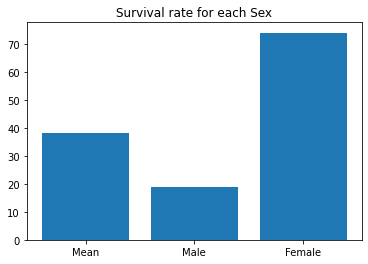

In [6]:
# Mean of survival rate
survivalRate = len(trainData_c[trainData_c["Survived"] == 1]) / len(trainData_c) * 100

# Survival rate of male
survivalRateOfMale = len(
    trainData_c[trainData_c["Sex"] == "male"][trainData_c["Survived"] == 1]
    ) / len(
        trainData_c[trainData_c["Sex"] == "male"]
        ) * 100

# Survival rate of female
survivalRateOfFemale = len(
    trainData_c[trainData_c["Sex"] == "female"][trainData_c["Survived"] == 1]
    ) / len(
        trainData_c[trainData_c["Sex"] == "female"]
        ) * 100

plt.bar(["Mean", "Male", "Female"], [survivalRate, survivalRateOfMale, survivalRateOfFemale])
plt.title("Survival rate for each Sex")

#### The relation between Survival rate and Embarked

In [7]:
# The kind of "Embarked"
trainData_c["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
# Null check
print("The number of null about Embarked:", trainData_c["Embarked"].isnull().sum())
print("The % of null about Embarked:{:%}".format(trainData_c["Embarked"].isnull().sum() / len(trainData_c)))

The number of null about Embarked: 2
The % of null about Embarked:0.224467%


/tmp/ipykernel_16114/1639390578.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trainData_c[trainData_c["Embarked"] == "S"][trainData_c["Survived"] == 1]
/tmp/ipykernel_16114/1639390578.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trainData_c[trainData_c["Embarked"] == "C"][trainData_c["Survived"] == 1]
/tmp/ipykernel_16114/1639390578.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trainData_c[trainData_c["Embarked"] == "Q"][trainData_c["Survived"] == 1]
/tmp/ipykernel_16114/1639390578.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trainData_c[trainData_c["Embarked"].isnull()][trainData_c["Survived"] == 1]


Text(0.5, 1.0, 'Survival rate for each harbor where people embarked')

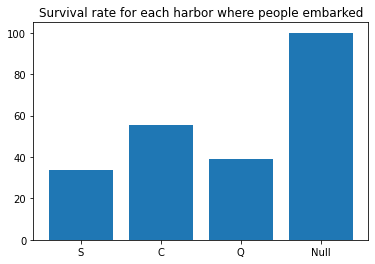

In [9]:
# Survival rate of Embarked == "S"
survivalRate_s = len(
    trainData_c[trainData_c["Embarked"] == "S"][trainData_c["Survived"] == 1]
    ) / len(
        trainData_c[trainData_c["Embarked"] == "S"]
        )*100

# Survival rate of Embarked == "C"
survivalRate_c = len(
    trainData_c[trainData_c["Embarked"] == "C"][trainData_c["Survived"] == 1]
    ) / len(
        trainData_c[trainData_c["Embarked"] == "C"]
        ) * 100

# Survival rate of Embarked == "Q"
survivalRate_q = len(
    trainData_c[trainData_c["Embarked"] == "Q"][trainData_c["Survived"] == 1]
    ) / len(
        trainData_c[trainData_c["Embarked"] == "Q"]
        ) * 100

# Survival rate of Embarked == nan
survivalRate_null = len(
    trainData_c[trainData_c["Embarked"].isnull()][trainData_c["Survived"] == 1]
    ) / len(
        trainData_c[trainData_c["Embarked"].isnull()]
        ) * 100

plt.bar(["S", "C", "Q", "Null"], [survivalRate_s, survivalRate_c, survivalRate_q, survivalRate_null])
plt.title("Survival rate for each harbor where people embarked")

#### The relation between Survival rate and Age

In [10]:
# Null check
print("The number of null about Age:", trainData_c["Age"].isnull().sum())
print("The % of null about Age:{:%}".format(trainData_c["Age"].isnull().sum() / len(trainData_c)))

The number of null about Age: 177
The % of null about Age:19.865320%


In [11]:
# The range of age
print("Minimum age:", trainData_c["Age"].min())
print("Maximum age:", trainData_c["Age"].max())

Minimum age: 0.42
Maximum age: 80.0


Text(0.5, 1.0, 'Distribution of Age')

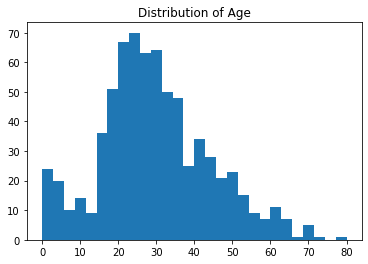

In [12]:
# Delete the data whose Age == null for analysis
trainData_with_age = trainData_c[trainData_c["Age"] != numpy.nan]

# Distribution of Age
## The number of bins are sqare root of the number of data
bins = numpy.linspace(0, 80, int(numpy.sqrt(len(trainData_with_age))))
plt.hist(trainData_with_age["Age"], bins = bins)
plt.title("Distribution of Age")

In [13]:
# Categorize on Age
trainData_with_age["0-9"] = (trainData_with_age["Age"] < 10).values
trainData_with_age["10-19"] = (trainData_with_age["Age"] >= 10).values * (trainData_with_age["Age"] < 20).values
trainData_with_age["20-29"] = (trainData_with_age["Age"] >= 20).values * (trainData_with_age["Age"] < 30).values
trainData_with_age["30-39"] = (trainData_with_age["Age"] >= 30).values * (trainData_with_age["Age"] < 40).values
trainData_with_age["40-49"] = (trainData_with_age["Age"] >= 40).values * (trainData_with_age["Age"] < 40).values
trainData_with_age["50-59"] = (trainData_with_age["Age"] >= 50).values * (trainData_with_age["Age"] < 60).values
trainData_with_age["60-69"] = (trainData_with_age["Age"] >= 60).values * (trainData_with_age["Age"] < 70).values
trainData_with_age["70-79"] = (trainData_with_age["Age"] >= 70).values * (trainData_with_age["Age"] < 80).values
trainData_with_age["80-89"] = (trainData_with_age["Age"] >= 80).values * (trainData_with_age["Age"] < 90).values

print("The number of people for each Age")
print("0-9:", len(trainData_with_age[trainData_with_age["0-9"]]))
print("10-19:", len(trainData_with_age[trainData_with_age["10-19"]]))
print("20-29:", len(trainData_with_age[trainData_with_age["20-29"]]))
print("30-39:", len(trainData_with_age[trainData_with_age["30-39"]]))
print("40-49:", len(trainData_with_age[trainData_with_age["40-49"]]))
print("50-59:", len(trainData_with_age[trainData_with_age["50-59"]]))
print("60-69:", len(trainData_with_age[trainData_with_age["60-69"]]))
print("70-79:", len(trainData_with_age[trainData_with_age["70-79"]]))
print("80-89:", len(trainData_with_age[trainData_with_age["80-89"]]))

The number of people for each Age
0-9: 62
10-19: 102
20-29: 220
30-39: 167
40-49: 0
50-59: 48
60-69: 19
70-79: 6
80-89: 1


/tmp/ipykernel_16114/1597551458.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trainData_with_age[trainData_with_age[c]][trainData_with_age["Survived"] == 1]


Text(0.5, 1.0, 'Survival rate for each Age')

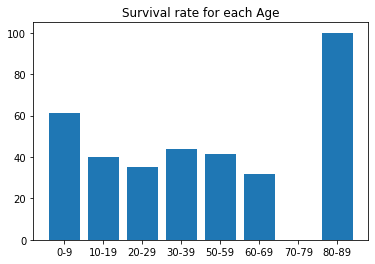

In [14]:
category = ["0-9", "10-19", "20-29", "30-39", "50-59", "60-69", "70-79", "80-89"]
survivalRate_age = []
for c in category:
    rate = len(
        trainData_with_age[trainData_with_age[c]][trainData_with_age["Survived"] == 1]
        ) / len(
            trainData_with_age[trainData_with_age[c]]
            ) * 100
    survivalRate_age.append(rate)

plt.bar(category, survivalRate_age)
plt.title("Survival rate for each Age")
    

# Preprocess Dataset

In [4]:
# type: pandas.DataFrame
trainDataPrep = myPrep.preprocess(data = trainData, targetColumn = TARGET_COLUMN)
trainDataPrep.head(10)

,Survived,Pclass,Age,Fare,MaleFlg,CFlg
0,0,3,22.000000,7.2500,True,False
1,1,1,38.000000,71.2833,False,True
2,1,3,26.000000,7.9250,False,False
3,1,1,35.000000,53.1000,False,False
4,0,3,35.000000,8.0500,True,False
5,0,3,29.699118,8.4583,True,False
6,0,1,54.000000,51.8625,True,False
7,0,3,2.000000,21.0750,True,False
8,1,3,27.000000,11.1333,False,False
9,1,2,14.000000,30.0708,False,True


# Build Model

In [5]:
# Divide train data into train & valid data
# type: numpy.ndarray
X = trainDataPrep.drop('Survived', axis = 1).values
y = trainDataPrep['Survived'].values

# (X_train, X_valid, y_train, y_valid) in order
dataForModel: tuple = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Get trained model and its accuracy
model, accuracy = myModeling.modeling(dataForModel, model = "LogisticRegression")

print(accuracy)

{'accuracy_train': 0.7935393258426966, 'accuracy_valid': 0.8100558659217877}


# Submit

In [6]:
# type: pandas.DataFrame
testData = myPrepare.getRawData(TEST_DATA_PATH)
testData.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
# type: pandas.DataFrame
testDataPrep = myPrep.preprocess(data = testData, targetColumn = TARGET_COLUMN)
testDataPrep.head(10)

,Pclass,Age,Fare,MaleFlg,CFlg
0,3,34.5,7.8292,True,False
1,3,47.0,7.0000,False,False
2,2,62.0,9.6875,True,False
3,3,27.0,8.6625,True,False
4,3,22.0,12.2875,False,False
5,3,14.0,9.2250,True,False
6,3,30.0,7.6292,False,False
7,2,26.0,29.0000,True,False
8,3,18.0,7.2292,False,True
9,3,21.0,24.1500,True,False


In [8]:
pred = model.predict(testDataPrep)

In [9]:
submitData = pandas.DataFrame({
    'PassengerId': testData['PassengerId'],
    'Survived': pred
})

In [10]:
submitData.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [11]:
submitData.to_csv(SUBMISSION_PATH, index = False)